# Prosper Loan Data Findings
## by Mariam Joan

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import figure, show
from seaborn import countplot

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
prosper = pd.read_csv('prosperLoanData.csv')

In [3]:
prosper_clean = prosper.copy()

In [4]:
prosper.shape

(113937, 81)

In [5]:
# prosper.info()

In [6]:
# prosper.describe()

In [7]:
# prosper.dtypes

In [8]:
prosper.head(1)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258


In [9]:
# prosper_clean.isnull().sum()

In [10]:
prosper_clean.AmountDelinquent.isnull().values.sum(), prosper_clean.TotalProsperLoans.isnull().values.sum() 

(7622, 91852)

In [11]:
prosper_clean.fillna(0, inplace=True)

##### check df which columns are "categorical" or non-numeric

In [12]:
cols = prosper_clean.columns # cite 1
num_cols = prosper_clean._get_numeric_data().columns
list(set(cols) - set(num_cols))

['LoanOriginationDate',
 'ProsperRating (Alpha)',
 'LoanKey',
 'IncomeRange',
 'DateCreditPulled',
 'FirstRecordedCreditLine',
 'ClosedDate',
 'GroupKey',
 'LoanOriginationQuarter',
 'EmploymentStatus',
 'CreditGrade',
 'Occupation',
 'BorrowerState',
 'LoanStatus',
 'ListingCreationDate',
 'ListingKey',
 'MemberKey']

In [13]:
prosper_clean.drop(columns=['DelinquenciesLast7Years','RevolvingCreditBalance','BankcardUtilization',
                            'TradesOpenedLast6Months','IncomeVerifiable','TotalProsperPaymentsBilled',
                            'LoanFirstDefaultedCycleNumber','LoanNumber','ProsperRating (numeric)',
                            'ProsperRating (Alpha)','LoanKey','ListingKey','LenderYield',
                            'EstimatedEffectiveYield','CurrentlyInGroup','GroupKey','FirstRecordedCreditLine',
                            'CurrentCreditLines','OpenCreditLines','TotalCreditLinespast7years',
                            'OpenRevolvingAccounts','OpenRevolvingMonthlyPayment','InquiriesLast6Months',
                            'TotalInquiries','PublicRecordsLast10Years','PublicRecordsLast12Months','TotalTrades',
                            'LoanOriginationQuarter','LP_CustomerPayments','LP_CustomerPrincipalPayments',
                            'LP_InterestandFees','LP_ServiceFees','LP_CollectionFees','LP_GrossPrincipalLoss',
                            'LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments', 'LP_CustomerPrincipalPayments', 
                            'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 
                            'LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments'], axis=1, inplace=True)

In [14]:
prosper_clean = prosper_clean.rename(columns={"ListingCategory (numeric)": "ListingCategory"})

In [15]:
prosper_clean.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [16]:
ordinal_var_dict = {
            'Occupation': ['Other', 'Professional', 'Skilled Labor', 'Executive',
               'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
               'Waiter/Waitress', 'Construction', 'Computer Programmer',
               'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
               'Military Enlisted', 'Clerical', 'Teacher', 'Clergy',
               'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
               "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
               'Nurse (LPN)', 'Military Officer', 'Food Service Management',
               'Truck Driver', 'Administrative Assistant',
               'Police Officer/Correction Officer', 'Social Worker',
               'Tradesman - Mechanic', 'Medical Technician', 'Professor',
               'Postal Service', 'Civil Service', 'Pharmacist',
               'Tradesman - Electrician', 'Scientist', 'Dentist',
               'Engineer - Electrical', 'Architect', 'Landscaping',
               'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
               'Engineer - Chemical', 'Doctor', 'Chemist',
               'Student - College Senior', 'Principal', "Teacher's Aide",
               'Pilot - Private/Commercial', 'Religious', 'Homemaker',
               'Student - College Graduate Student', 'Student - Technical School',
               'Psychologist', 'Biologist', 'Student - College Sophomore',
               'Judge', 'Student - College Junior', 'Car Dealer',
               'Student - Community College', 'Student - College Freshman'],
            'ListingCategory': [0, 2, 16, 1, 7, 13, 6, 15, 20, 19, 3, 18, 8, 
                4, 11, 14, 5, 9, 17, 10, 12],
            'CreditGrade':['C', 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'],
            'LoanStatus': ['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
               'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
               'Past Due (61-90 days)', 'Past Due (31-60 days)',
               'Past Due (91-120 days)', 'FinalPaymentInProgress',
               'Past Due (>120 days)'], 
            'BorrowerState': ['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', 'AL', 'AZ',
               'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA',
               'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT', 'DC', 'MA',
               'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'MT', 'HI',
               'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND'],
            'EmploymentStatus':['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
                 'Not employed', 'Part-time', 'Retired'],
            'IncomeRange':['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
               '$75,000-99,999', '$1-24,999', 'Not employed', '$0']}
    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,categories = ordinal_var_dict[var])
    prosper_clean[var] = prosper_clean[var].astype(ordered_var)

In [17]:
prosper_clean.select_dtypes(include=['category'])

,CreditGrade,LoanStatus,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IncomeRange
0,C,Completed,0,CO,Other,Self-employed,"$25,000-49,999"
1,NaN,Current,2,CO,Professional,Employed,"$50,000-74,999"
2,HR,Completed,0,GA,Other,Not available,Not displayed
3,NaN,Current,16,GA,Skilled Labor,Employed,"$25,000-49,999"
4,NaN,Current,2,MN,Executive,Employed,"$100,000+"
5,NaN,Current,1,NM,Professional,Employed,"$100,000+"
6,NaN,Current,1,KS,Sales - Retail,Employed,"$25,000-49,999"
7,NaN,Current,2,CA,Laborer,Employed,"$25,000-49,999"
8,NaN,Current,7,IL,Food Service,Employed,"$25,000-49,999"
9,NaN,Current,7,IL,Food Service,Employed,"$25,000-49,999"


In [18]:
prosper_clean['DateCreditPulled'] = pd.to_datetime(prosper_clean['DateCreditPulled'])
prosper_clean['LoanOriginationDate'] = pd.to_datetime(prosper_clean['LoanOriginationDate'])  
prosper_clean['ListingCreationDate'] = pd.to_datetime(prosper_clean['ListingCreationDate'])  

In [19]:
prosper_clean['DateCreditPulled'] = prosper_clean['DateCreditPulled'].map(lambda x: x.strftime('%Y%m%d%' + ' ' + '%I:%M %p') if x else "")
prosper_clean['LoanOriginationDate'] = prosper_clean['LoanOriginationDate'].map(lambda x: x.strftime('%Y%m%d%' + ' ' + '%I:%M %p') if x else "")
prosper_clean['ListingCreationDate'] = prosper_clean['ListingCreationDate'].map(lambda x: x.strftime('%Y%m%d%' + ' ' + '%I:%M %p') if x else "")

### What is the structure of your dataset?

> The Prosper Loans consists of 82 attributes with 113066 unique listings. I've decided to focus on 42 important features which include loan member characteristics and what might be driving factors of estimated repayment verses loss. These variables differ from numeric to categorical. You can explore all variable definitions here: https://docs.google.com/spreadsheets/d/1VtTHJgXz_oY8RRVGPKwFeYtN1BR23ZZMLJMqj_DaccQ/edit#gid=0.

### What is/are the main feature(s) of interest in your dataset?

> The main features of this dataset will be user defined characteristics such as, state of residence, monthly income, credit rating, delinquency, borrower rate, occupation, loan status, and Prosper Score. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> ##### let's start with histograms for our univariate exploration, histograms divide a variable into bins, counting frequency of each data points within the bin, appear on the x-axis while counts appear on the y-axis
> ##### looking at borrower rate we can see there is a left skew with sharp drop off after 0.2% potentially meaning most borrower's receive about the minimum rate when taking out a loan

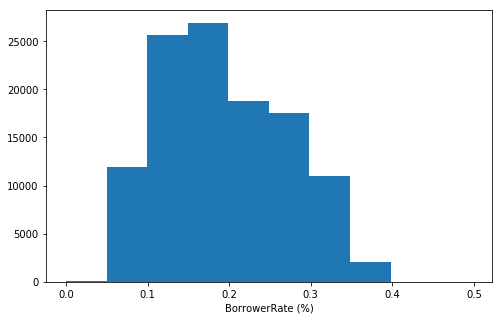

In [57]:
bins = np.arange(0, prosper_clean['BorrowerRate'].max()+10,10)
plt.figure(figsize=[8,5])
plt.hist(data = prosper_clean, x=prosper_clean['BorrowerRate'])
plt.xlabel('BorrowerRate (%)')
plt.show()

> ##### looking at estimated return we see there is a spike at 0.0% and somewhat of a right skewed distribution with a peak between 0.05% and about 0.33 shy of 0.1%, which could mean rate of returns with prosper loans are mostly in the range between slightly less than 0.1% 

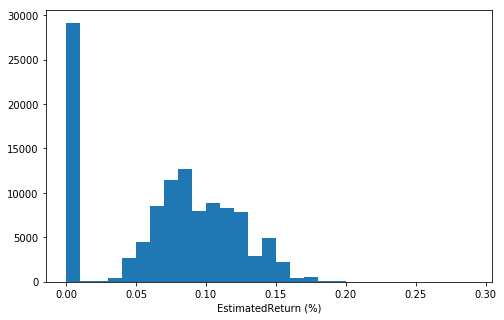

In [72]:
bins = np.arange(0, prosper_clean['EstimatedReturn'].max()+0.01,0.01)
plt.figure(figsize=[8,5])
plt.hist(data = prosper_clean, x=prosper_clean['EstimatedReturn'],bins=bins)
plt.xlabel('EstimatedReturn (%)')
plt.show()

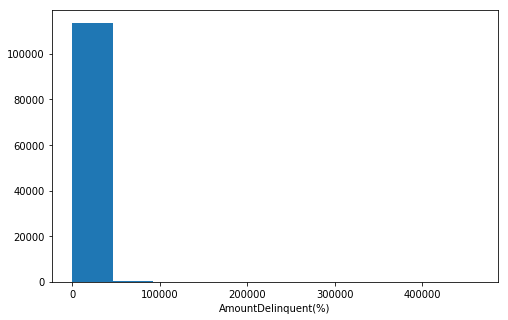

In [25]:
bins = np.arange(0, prosper_clean['AmountDelinquent'].max()+10,10)
plt.figure(figsize=[8,5])
plt.hist(data = prosper_clean, x=prosper_clean['AmountDelinquent'])
plt.xlabel('AmountDelinquent(%)')
plt.show()

##### seeing the skewed bar chart above means we can try for a log scale instead for a normal distribution

In [26]:
prosper_clean.AmountDelinquent.describe()

count    113937.000000
mean        918.646866
std        6919.065398
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      463881.000000
Name: AmountDelinquent, dtype: float64

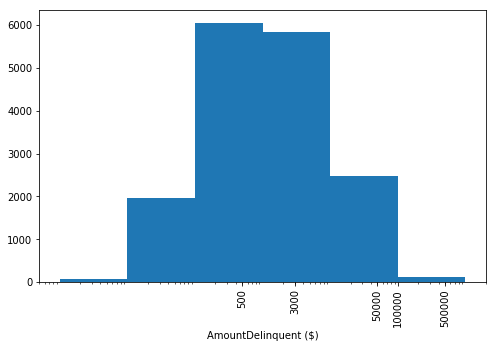

In [27]:
log_binsize = 1
bins = 10 ** np.arange(0, np.log10(prosper_clean['AmountDelinquent'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])

plt.hist(data = prosper_clean, x = 'AmountDelinquent', bins = bins)
plt.xscale('log')
plt.xticks([500, 3000, 50000, 100000, 500000], [500, 3000, 50000, 100000, 500000])
plt.xlabel('AmountDelinquent ($)')
plt.xticks(rotation=90)
plt.show()

In [49]:
base_color = sb.color_palette()[0]

In [50]:
total_credit_shape = float(prosper_clean.CreditGrade.shape[0])

In [51]:
descending_order = prosper_clean['CreditGrade'].value_counts().sort_values(ascending=False).index

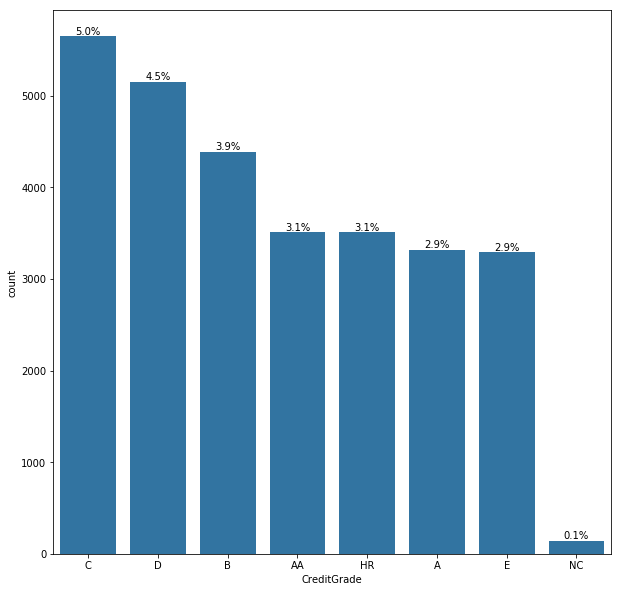

In [52]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sb.countplot(x="CreditGrade", data=prosper_clean,
                  order=descending_order, color=base_color)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]  # cite 2
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/total_credit_shape), (x.mean(), y), 
            ha='center', va='bottom') 

##### these numbers need further clarification with percentages 

In [46]:
total_loan_status = float(prosper_clean.LoanStatus.shape[0])

In [47]:
descending_order = prosper_clean['LoanStatus'].value_counts().sort_values(ascending=False).index

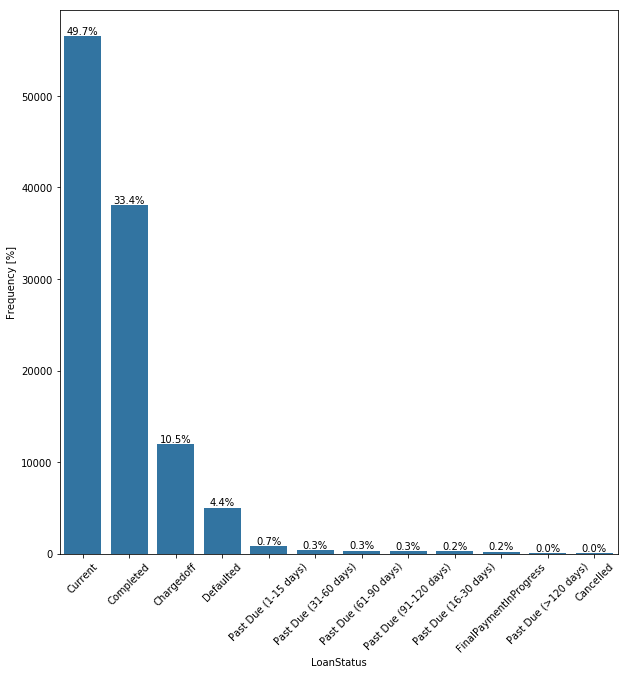

In [48]:
f, ax = plt.subplots(figsize=(10, 10))

ax = sb.countplot(x="LoanStatus", data=prosper_clean, 
                  order=descending_order, color=base_color)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]  # cite 2
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/total_loan_status), (x.mean(), y), 
            ha='center', va='bottom') 

ax.set_ylabel('Frequency [%]')
plt.setp(ax.get_xticklabels(), rotation=45);

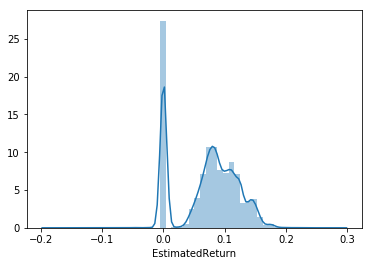

In [185]:
sb.distplot(prosper_clean.EstimatedReturn);

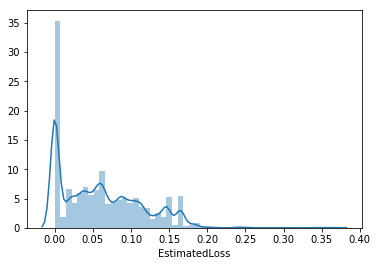

In [77]:
sb.distplot(prosper_clean.EstimatedLoss);

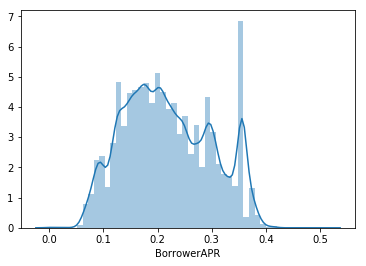

In [79]:
sb.distplot(prosper_clean.BorrowerAPR);

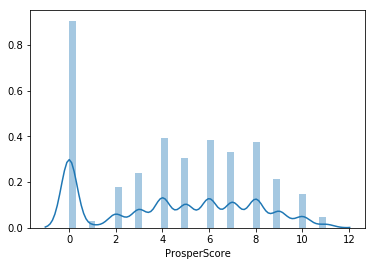

In [83]:
sb.distplot(prosper_clean.ProsperScore);

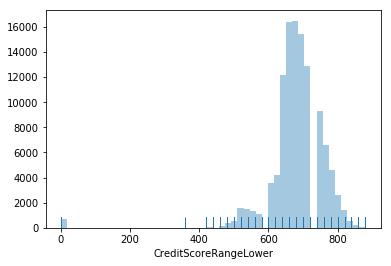

In [86]:
sb.distplot(prosper_clean.CreditScoreRangeLower, kde=False, rug=True);

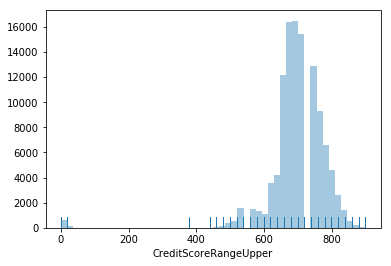

In [87]:
sb.distplot(prosper_clean.CreditScoreRangeUpper, kde=False, rug=True);

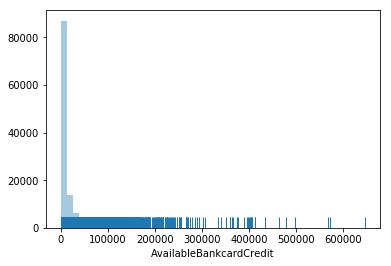

In [88]:
sb.distplot(prosper_clean.AvailableBankcardCredit, kde=False, rug=True);

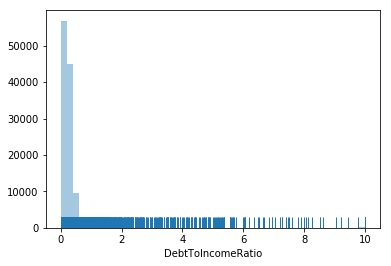

In [101]:
sb.distplot(prosper_clean.DebtToIncomeRatio, kde=False, rug=True);

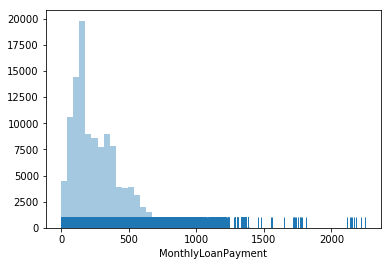

In [98]:
sb.distplot(prosper_clean.MonthlyLoanPayment, kde=False, rug=True);

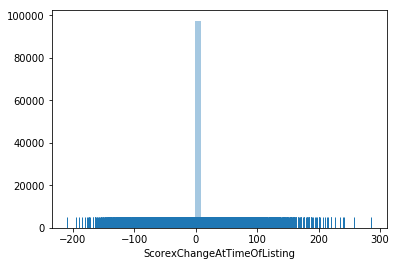

In [95]:
sb.distplot(prosper_clean.ScorexChangeAtTimeOfListing, kde=False, rug=True);

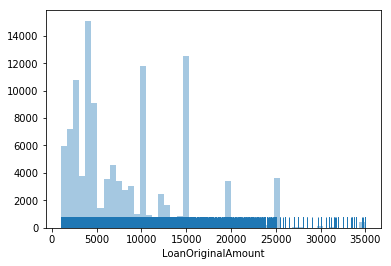

In [97]:
sb.distplot(prosper_clean.LoanOriginalAmount, kde=False, rug=True);

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [125]:
numeric_vars = ['Term', 'BorrowerAPR', 'BorrowerRate', 'EstimatedReturn',
                'InvestmentFromFriendsCount', 'Investors', 
               'PercentFunded']
categoric_vars = ['LoanStatus', 'ListingCategory', 'BorrowerState', 
                  'CreditGrade', 'Occupation', 'EmploymentStatus', 
                  'EmploymentStatusDuration', 'IsBorrowerHomeowner', 
                  'IncomeRange', 'StatedMonthlyIncome']

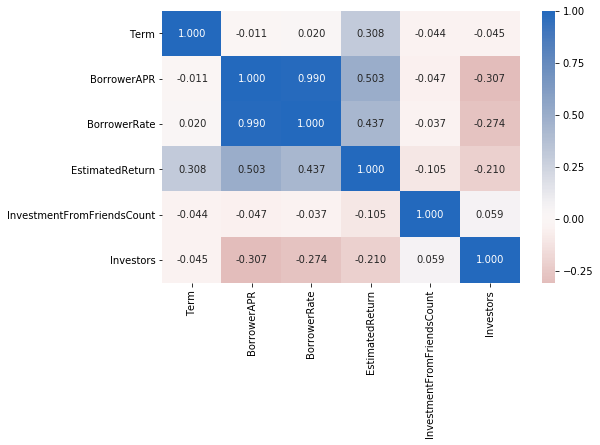

In [126]:
plt.figure(figsize = [8, 5])
sb.heatmap(prosper_clean[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

> #### Citations:
1. https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical?noredirect=1&lq=1
2. https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
